# Subreddit Recommender
### Exploratory Data Analysis

In [1]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [2]:
# GLOBAL VARIABLES


In [3]:
# IMPORT THE DATA
try:
    # import the data from csv
    data = pd.read_csv('reddit_user_subreddit.csv')
except:
    # import and run the sql query
    connection = sqlite3.connect('reddit_data.db')
    data = pd.read_sql_query(
    """
    SELECT O.username_id, S.subreddit, COUNT(O.utc) AS visits
        FROM
            Subreddit S,
            Observation O
        WHERE S.subreddit_id = O.subreddit_id
        GROUP BY O.username_id, S.subreddit
        ;
    """,
    connection
    )

    data.to_csv('reddit_user_subreddit.csv')

In [22]:
# VISUALLY INSPECT THE DATA
data.head()
# data.tail()

,username_id,subreddit,COUNT(O.utc)
0,0,AOImmortals,2
1,0,Addons4Kodi,1
2,0,AdviceAnimals,7
3,0,AskReddit,14
4,0,Assistance,9


In [19]:
# data.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
data.tail(30)

,username_id,subreddit,COUNT(O.utc)
892432,22606,todayilearned,1
892433,22606,travel,11
892434,22607,getdisciplined,3
892435,22608,FFBraveExvius,26
892436,22608,ffbe,8
892437,22609,AskReddit,187
892438,22609,ICanDrawThat,2
892439,22609,Kaylemains,3
892440,22609,LeagueofLegendsMeta,1
892441,22609,Metal,7


In [9]:
# ASSESS - HOW MUCH DATA CLEANING IS NEEDED? 
data.info() # we can see that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892462 entries, 0 to 892461
Data columns (total 3 columns):
username_id     892462 non-null int64
subreddit       892462 non-null object
COUNT(O.utc)    892462 non-null int64
dtypes: int64(2), object(1)
memory usage: 20.4+ MB


In [11]:
data.dtypes

username_id      int64
subreddit       object
COUNT(O.utc)     int64
dtype: object

In [25]:
# x = pd.DataFrame([[0, 1], ['0', '1']])
# x = pd.DataFrame([['0', '1'], ['0', '1']])
x = pd.DataFrame([[0, 1], [0, 1]])
print(x.dtypes)
x2 = x[0].astype('str')
x2.dtypes # confirmed, plan to run .astype('str') on the data['subreddit'] column, just in case 

0    int64
1    int64
dtype: object


dtype('O')

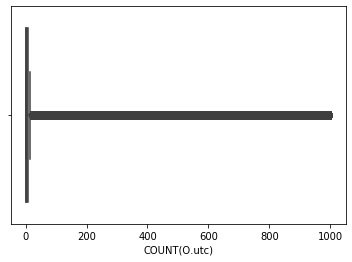

In [17]:
# LOOK AT THE DISTRIBUTION OF THE COUNTS
sns.boxplot(x = data['COUNT(O.utc)']) 

In [23]:
data2 = data.copy()

In [ ]:
for user in data2['username_id'].unique():
    
    data2[ data2['username_id'] == user]['ratings'] = data2[ data2['username_id'] == user]['COUNT(O.utc)'] / (data2[ data2['username_id'] == user]['COUNT(O.utc)'].sum() )
    
data2.head()

/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
